<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Shop-item-quantity-sold" data-toc-modified-id="Shop-item-quantity-sold-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Shop-item quantity sold</a></span></li></ul></div>

#### Shop-item quantity sold

In [1]:
import boto3
import pandas as pd

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
s3_client = boto3.client("s3")
response = s3_client.get_object(Bucket='my-rds-exports', Key='sid_qty_sold_stats.csv')
status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")


if status == 200:
    print(f"Successful S3 get_object response. Status - {status}")
    df = pd.read_csv(response.get("Body"), dtype={
        'shop_id': 'int8',
        'item_id': 'int16',
        'total_days': 'int16',
        'days_w_zero_qty': 'int16',
        'pct_zero_qty_days': 'float32',
        'avg_non_zero_qty': 'float32',
        'sum_non_zero_qty': 'int16',
        'med_non_zero_qty': 'float32',
        'std_non_zero_qty': 'float32',
        'min_non_zero_qty': 'int16',
        'max_non_zero_qty': 'int16'
    })
else:
    print(f"Unsuccessful S3 get_object response. Status - {status}")

Successful S3 get_object response. Status - 200


In [34]:
df.shape

(424124, 11)

In [28]:
df.head()

,shop_id,item_id,total_days,days_w_zero_qty,pct_zero_qty_days,avg_non_zero_qty,sum_non_zero_qty,med_non_zero_qty,std_non_zero_qty,min_non_zero_qty,max_non_zero_qty
0,0,30,12,3,0.250000,3.444444,31,3.0,2.242271,2,9
1,0,31,12,5,0.416667,1.571429,11,1.0,0.975900,1,3
2,0,32,54,43,0.796296,1.454545,16,1.0,0.522233,1,2
3,0,33,55,49,0.890909,1.000000,6,1.0,0.000000,1,1
4,0,35,25,13,0.520000,1.250000,15,1.0,0.452267,1,2


In [29]:
df.dtypes

shop_id                 int8
item_id                int16
total_days             int16
days_w_zero_qty        int16
pct_zero_qty_days    float32
avg_non_zero_qty     float32
sum_non_zero_qty       int16
med_non_zero_qty     float32
std_non_zero_qty     float32
min_non_zero_qty       int16
max_non_zero_qty       int16
dtype: object

In [30]:
df.isnull().sum()

shop_id                   0
item_id                   0
total_days                0
days_w_zero_qty           0
pct_zero_qty_days         0
avg_non_zero_qty          0
sum_non_zero_qty          0
med_non_zero_qty          0
std_non_zero_qty     130245
min_non_zero_qty          0
max_non_zero_qty          0
dtype: int64

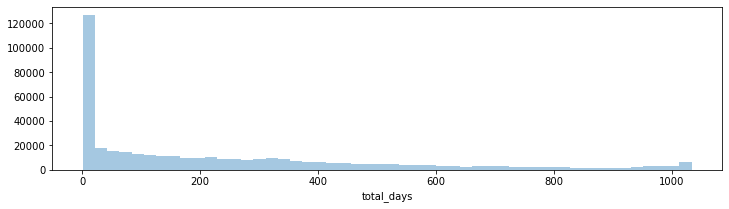

In [52]:
plt.figure(figsize=(12,3))
sns.distplot(df.total_days, kde=False)
plt.show()

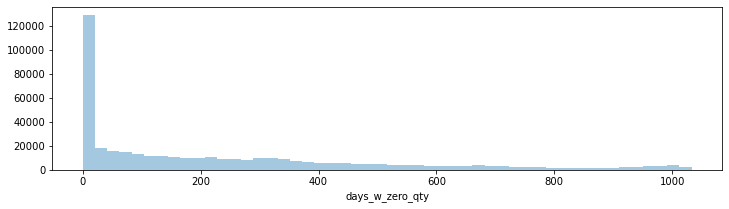

In [53]:
plt.figure(figsize=(12,3))
sns.distplot(df.days_w_zero_qty, kde=False)
plt.show()

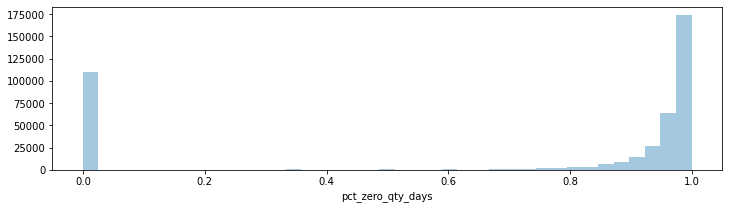

In [54]:
plt.figure(figsize=(12,3))
sns.distplot(df.pct_zero_qty_days, kde=False)
plt.show()

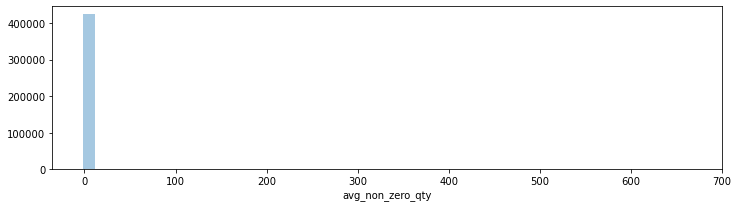

In [55]:
plt.figure(figsize=(12,3))
sns.distplot(df.avg_non_zero_qty, kde=False)
plt.show()

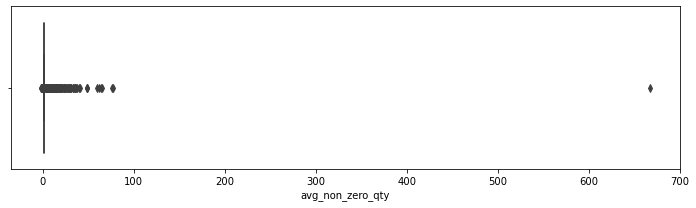

In [56]:
plt.figure(figsize=(12,3))
sns.boxplot(df.avg_non_zero_qty)
plt.show()

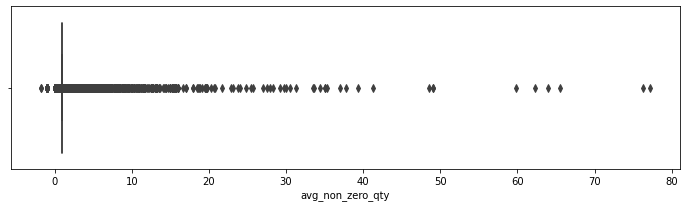

In [62]:
plt.figure(figsize=(12,3))
sns.boxplot(df[df.avg_non_zero_qty < 100]['avg_non_zero_qty'])
plt.show()

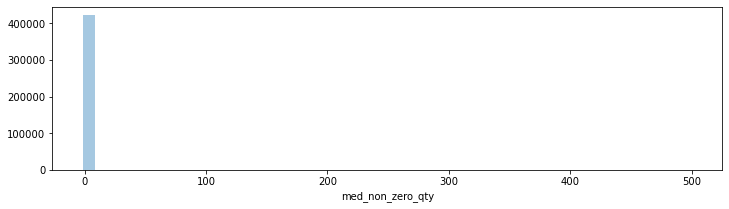

In [57]:
plt.figure(figsize=(12,3))
sns.distplot(df.med_non_zero_qty, kde=False)
plt.show()

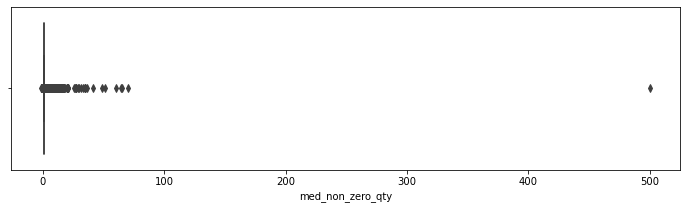

In [58]:
plt.figure(figsize=(12,3))
sns.boxplot(df.med_non_zero_qty)
plt.show()

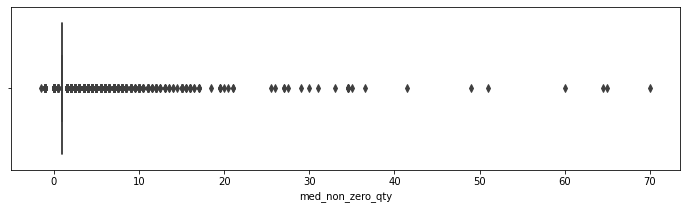

In [64]:
plt.figure(figsize=(12,3))
sns.boxplot(df[df.med_non_zero_qty < 100]['med_non_zero_qty'])
plt.show()

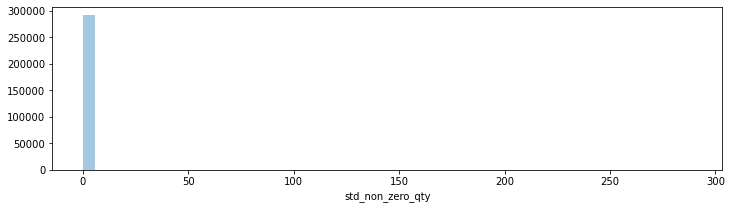

In [59]:
plt.figure(figsize=(12,3))
sns.distplot(df[df.std_non_zero_qty.notnull()]['std_non_zero_qty'], kde=False)
plt.show()

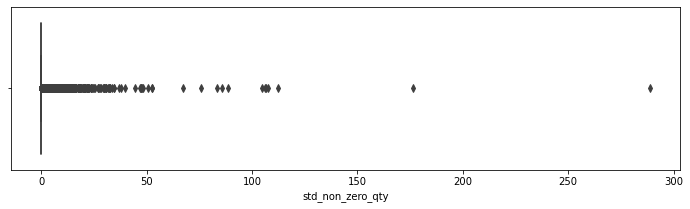

In [60]:
plt.figure(figsize=(12,3))
sns.boxplot(df[df.std_non_zero_qty.notnull()]['std_non_zero_qty'])
plt.show()